# **Demonstration: Generating multiclass redshift probability distribution**
# Import libraries

In [1]:
from pathlib import Path
from json import load
from PDF_MC import PDF_MC 

# Import default configurations

model_config.json has default hyperparameters for the PDF_MC model: 
* number of input features
* nubmer of hidden neurons for each layer
* nubmer of hidden layers
* nubmer of training epochs
* learning rate
* batch size
* momentum

In [2]:
PACKAGE_PATH = Path.cwd()
with open("./model_config.json", "r") as f:
    json_dict = load(f)
    PDF_MC_config = json_dict["model"]["PDF_MC"]
PDF_MC_config

{'num_input_features': 5,
 'num_hidden_neurons': 128,
 'num_hidden_layers': 5,
 'num_epochs': 300,
 'learning_rate': 0.001,
 'size_batch': 32,
 'momentum': 0.9}

# Update the config

Input/output paths and training-specific hyperparameters should be updated before traning

* Input/output paths
    * `input_csv_path`: the path of the input csv file of photometric redshift
    * `output_pdf_path`
    * `model_path`: the path of the bese model to be saved

* Training-specific hyperparameters
    * `CO_ratio`
    * `weights`: written in the format of [[range...], [weights...]]
    * `train_ratio`: the ratio of a training set -- a value in between 0 and 1
    * `rebalance`: perform rebalancing if set to True
    * `rebalance_list`: a list of ranges and weights to rebalance; written in the same format as weights
    * `evaluation`: perform base-evaluation if set to True
    * `evaluation_ratio`: the ratio of a base evaluation set -- a value in between 0 and 1

* Others
    * `model_no`: model number (not a hyperparameter) 

In [ ]:
PDF_MC_config.update({
    "input_csv_path": PACKAGE_PATH / 'data/relz_EPDF.csv',
    "output_dir_path": PACKAGE_PATH,
    "model_path": PACKAGE_PATH,

    # hyperparameters
    "CO_ratio": 0.25,
    "weights_list": [[1, 2], [2, 15]],
    "train_ratio": 0.999,

    # rebalance
    "rebalance": True,
    # "rebalance_list": [[1,2,3], [0.5, 0.5, 0.5]], # for hsc
    "rebalance_list": [[2,3,4], [0.5, 0.5, 0.5]], # for relz

    # base-evaluation
    "evaluation": True,
    "evaluation_ratio": 0.3,
    
    'model_no': 0
})

# Train a model

Result of training is printed out and saved in PDF and CSV during the `PDF_MC.save_results()` function call

`model_no` is incremented by 1 every trianing, which is specified in the file names of a saved model and a result file, which can be found in `PZ_CO_ID\results\`

The output shows the scatter plot of spectroscopic redshift vs. photometric redshift produced by this model.
Below the scatter plot, fractions of NOs and COs in each bin are specified.

#### The model training falls into a local minima and produces a very wrong result sometimes. If so, just run again.

Epoch [10/300], Loss: 2.076759815216

Epoch [20/300], Loss: 1.314231634140

best model
Epoch [22/300], Loss: 0.873560547829

best model
Epoch [27/300], Loss: 0.798003137112

best model
Epoch [30/300], Loss: 0.787426531315

best model
Epoch [31/300], Loss: 0.760022580624

Epoch [40/300], Loss: 1.134297728539

best model
Epoch [41/300], Loss: 0.605090916157

Epoch [50/300], Loss: 0.815781652927

best model
Epoch [56/300], Loss: 0.602664887905

Epoch [60/300], Loss: 1.009947657585

Epoch [70/300], Loss: 0.704059779644

best model
Epoch [74/300], Loss: 0.516330540180

Epoch [80/300], Loss: 0.758714318275

Epoch [90/300], Loss: 0.793205320835

best model
Epoch [95/300], Loss: 0.500412940979

Epoch [100/300], Loss: 0.598199427128

Epoch [110/300], Loss: 0.684392511845

Epoch [120/300], Loss: 0.976414740086

best model
Epoch [125/300], Loss: 0.483406394720

Epoch [130/300], Loss: 0.788265883923

Epoch [140/300], Loss: 0.815283954144

Epoch [150/300], Loss: 0.906226575375

Epoch [160/300], Los

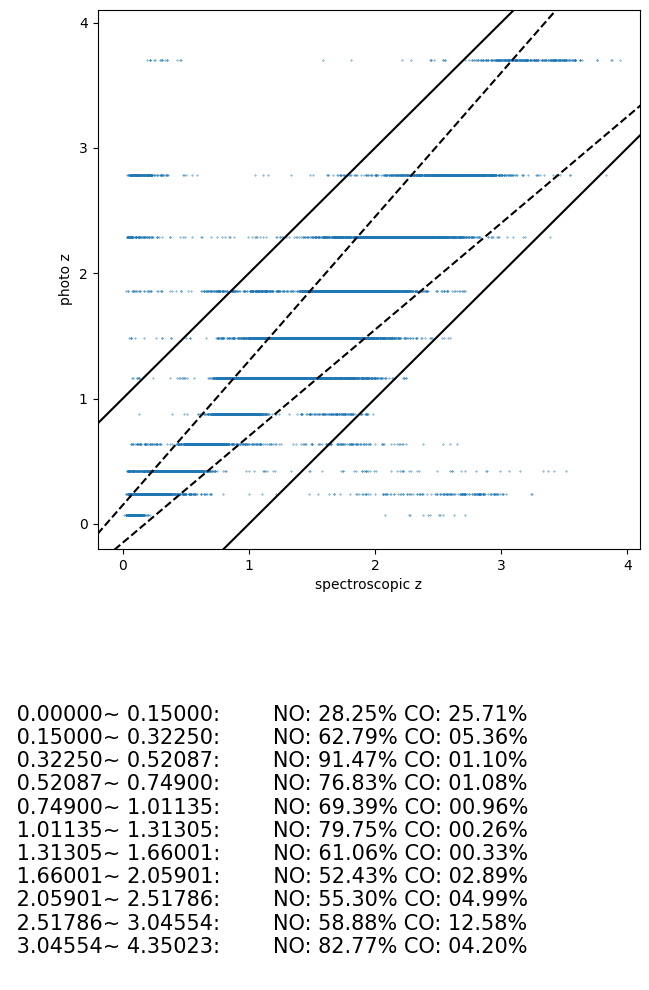

In [4]:
for i in range(1): # change the number to train models for multiple times
    PDF_MC_config['model_no'] += 1

    PDF_MC_model = PDF_MC(**PDF_MC_config)
    
    data = PDF_MC_model.preprocess_data()
    dl = PDF_MC_model.build_dl(data)
    best_model = PDF_MC_model.train_model(dl)
    results = PDF_MC_model.evaluate_model(data, dl)
    PDF_MC_model.save_results(data, results)